## Descargar csv de delitos en la página de Buenos Aires Data: https://data.buenosaires.gob.ar/dataset/delitos

Importamos las librerias que utilizaremos

In [ ]:
import pandas as pd
import plotly.express as px  
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/delitos_2020_validado.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

id_mapa  anio    mes  ...    latitud   longitud victimas
0  HC-2020-0007157  2020  Enero  ... -34.592133 -58.439106      1.0
1  HC-2020-0009055  2020  Enero  ... -34.646459 -58.450195      1.0
2  HC-2020-0022499  2020  Enero  ... -34.609272 -58.393379      1.0
3  HC-2020-0028163  2020  Enero  ... -34.624766 -58.410372      1.0
4  HC-2020-0029931  2020  Enero  ... -34.609303 -58.390526      1.0

[5 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66578 entries, 0 to 66577
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_mapa    66578 non-null  object 
 1   anio       66578 non-null  int64  
 2   mes        66578 non-null  object 
 3   dia        66578 non-null  object 
 4   fecha      66578 non-null  object 
 5   franja     66578 non-null  object 
 6   tipo       66578 non-null  object 
 7   subtipo    13609 non-null  object 
 8   uso_armas  7265 non-null   object 
 9   barrio     66167 non-null  object 
 10  comuna     66167 non-null  float64
 11  latitud    66167 non-null  float64
 12  longitud   66167 non-null  float64
 13  victimas   188 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 7.1+ MB


Otra forma de ver solo el tipo por cada columna

In [ ]:
df.dtypes

id_mapa       object
anio           int64
mes           object
dia           object
fecha         object
franja        object
tipo          object
subtipo       object
uso_armas     object
barrio        object
comuna       float64
latitud      float64
longitud     float64
victimas     float64
dtype: object

Si queremos saber solo el tamaño de la base de datos, usamos el comando shape


In [ ]:
df.shape

(66578, 14)

Si queremos ver el total de los valores que componen mi base de datos usamos size

In [ ]:
df.size

932092

Cantidad de valores nulos por columnas

In [ ]:
df.isnull().sum()

id_mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      52969
uso_armas    59313
barrio         411
comuna         411
latitud        411
longitud       411
victimas     66390
dtype: int64

Renombramos la columna tipo para que sea mas transparente 

In [ ]:
df = df.rename(columns={'tipo':'tipo_delito'})

In [ ]:
df.columns

Index(['id_mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo_delito',
       'subtipo', 'uso_armas', 'barrio', 'comuna', 'latitud', 'longitud',
       'victimas'],
      dtype='object')

A la columna comuna pasarla a int porque esta como flotante y no es correcto.

In [ ]:
df = df.dropna(subset=['comuna'])

In [ ]:
df.comuna = df.comuna.astype(int)

In [ ]:
df.dtypes

id_mapa         object
anio             int64
mes             object
dia             object
fecha           object
franja          object
tipo_delito     object
subtipo         object
uso_armas       object
barrio          object
comuna           int64
latitud        float64
longitud       float64
victimas       float64
dtype: object

In [ ]:
df.isnull().sum()

id_mapa            0
anio               0
mes                0
dia                0
fecha              0
franja             0
tipo_delito        0
subtipo        52870
uso_armas      58914
barrio             0
comuna             0
latitud            0
longitud           0
victimas       65979
dtype: int64

Veamos los dias

In [ ]:
df.dia.unique()

array(['Sábado', 'Domingo', 'Martes', 'Lunes', 'Jueves', 'Miércoles',
       'Viernes', 'Mi�rcoles'], dtype=object)

In [ ]:
df.dia = df.dia.replace({'Mi�rcoles':'Miercoles','Miércoles':'Miercoles'})

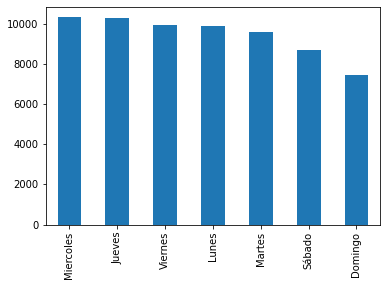

In [ ]:
df.dia.value_counts().plot(kind='bar')

Tipo de delitos



In [ ]:
df.tipo_delito.unique()

array(['Homicidio', 'Lesiones', 'Robo (con violencia)',
       'Hurto (sin violencia)'], dtype=object)

In [ ]:
df.tipo_delito.nunique()

4

Cantidad de delitos por mes

In [ ]:
df3 = df.groupby(['mes'])['tipo_delito'].count().reset_index(name='count')
df3

mes  count
0        Abril   1897
1       Agosto   4601
2    Diciembre   6600
3        Enero   9797
4      Febrero   9334
5        Julio   4073
6        Junio   3686
7        Marzo   5999
8         Mayo   3081
9    Noviembre   6461
10     Octubre   5694
11  Septiembre   4944

Graficamos usando Plotly. Tambien tenemos template para customizar los estilos https://plotly.com/python/templates/

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
fig = px.bar(df3, x='mes', y='count',
             color='count',
             template='plotly_dark',
             labels={'count':'Cantidad de casos','mes':'Mes'},
             title='Cantidad de delitos por mes',
             height=400)
fig.show()

Cantidad de delitos por dia

In [ ]:
df4 = df.groupby(['dia'])['tipo_delito'].count().reset_index(name='count')
df4

dia  count
0    Domingo   7454
1     Jueves  10266
2      Lunes   9886
3     Martes   9610
4  Miercoles  10313
5     Sábado   8704
6    Viernes   9934

Grafiquemos..

In [ ]:
fig = px.bar(df4, x='dia', y='count',
              color='count',
              labels={'tipo_delito':'Tipo Delito','dia':'Día'}, 
              height=400,
              template='ggplot2',
              title="Cantidad de delitos por dia"
      )
fig.show()

Veamos solo los casos de homicidio por barrio. ¿Se relacionará con la cantidad de casos totales por barrios?

In [ ]:
df7 = df[(df.tipo_delito == 'Homicidio')]
df7.head()

id_mapa  anio    mes  ...    latitud   longitud victimas
0  HC-2020-0007157  2020  Enero  ... -34.592133 -58.439106      1.0
1  HC-2020-0009055  2020  Enero  ... -34.646459 -58.450195      1.0
2  HC-2020-0022499  2020  Enero  ... -34.609272 -58.393379      1.0
3  HC-2020-0028163  2020  Enero  ... -34.624766 -58.410372      1.0
4  HC-2020-0029931  2020  Enero  ... -34.609303 -58.390526      1.0

[5 rows x 14 columns]

In [ ]:
df8 = df7.groupby('barrio')['tipo_delito'].count().reset_index(name='homicidio').sort_values(by='homicidio', 
                                                                             ascending=False)
df8.head()

barrio  homicidio
23        Retiro         21
2       Barracas         19
8   Constitución         15
1      Balvanera         13
9         Flores         12

# Cantidad de delitos por barrios


Lo que puedo hacer es filtrar por ejemplo los barrios con mas de 1000 delitos y graficar, para saber cual es el que tiene mas delitos. 

In [ ]:
df9 = df.groupby(['barrio'])['tipo_delito'].count().reset_index()
df10 = df9[df9.tipo_delito >= 2000]
df10.head()

barrio  tipo_delito
1    Almagro         2743
2  Balvanera         4501
3   Barracas         2420
4   Belgrano         2229
7  Caballito         3046

Me interesa saber la cantidad de delitos por comuna, porque por ejemplo puedo elegir un barrio que este en la comuna con menos delitos.

In [ ]:
df11 = df.groupby('comuna')['tipo_delito'].count().reset_index().sort_values(by='tipo_delito', 
                                                                             ascending=False)
df11.head()

comuna  tipo_delito
0        1         7972
3        4         6443
2        3         5847
13      14         5452
6        7         4946

In [ ]:
df11.tail()

comuna  tipo_delito
11      12         3369
10      11         3056
5        6         3046
1        2         3013
9       10         2862

¿Cuántos casos hay por tipo de delito?

In [ ]:
df13 = df['tipo_delito'].value_counts(ascending=True).reset_index()
df13

index  tipo_delito
0              Homicidio          187
1               Lesiones         6084
2  Hurto (sin violencia)        25563
3   Robo (con violencia)        34333

In [ ]:
df13.columns = ['tipo_delito', 'count']
df13

tipo_delito  count
0              Homicidio    187
1               Lesiones   6084
2  Hurto (sin violencia)  25563
3   Robo (con violencia)  34333

In [ ]:
fig = px.bar(df13, x='tipo_delito', y='count',
              color='count',
              labels={'tipo_delito':'Tipo Delito','dia':'Día'}, 
              height=400,
              template='xgridoff',
              title="Cantidad por tipo de delitos"
              #color_discrete_sequence=['#010915']
      )
fig.show()

# Y ahora nuestro mapa!!

Nos hacemos la cuenta en https://account.mapbox.com/ y usamos el token.

Diferencia entre Mapbox Maps vs Geo Maps: https://plotly.com/python/mapbox-layers/ y 

In [ ]:
df15 = df.groupby(['barrio','longitud','latitud'])['tipo_delito'].count().reset_index()
df15.head()

barrio   longitud    latitud  tipo_delito
0  Agronomía -58.502788 -34.593603            1
1  Agronomía -58.502717 -34.593559            1
2  Agronomía -58.502364 -34.594251            1
3  Agronomía -58.502140 -34.593133            1
4  Agronomía -58.501957 -34.593256            1

https://plotly.com/python/builtin-colorscales/ para el color.

In [ ]:
token = 'pk.eyJ1IjoicHJpc2NpbGFjZSIsImEiOiJja3B5MzB5MW4wNTh0MnBwazRwcndsbzhpIn0.Vfhtbes8SPKW2TKEhNcrrQ'

fig = go.Figure(go.Scattermapbox(
    lon=df15.longitud,
    lat=df15.latitud,
    mode = "markers+text",
    marker=go.scattermapbox.Marker(size=df15.tipo_delito,
                                    color=df15.tipo_delito,
                                    colorscale='Edge',
                                    showscale=True,
                                    sizemode='diameter', #area #cmbia los pixeles
                                    opacity=0.8),
    hoverinfo='text',
    hovertext=
    '<b>Barrio</b>: ' + df15['barrio'].astype(str) + '<br>' +
    '<b>Cantidad de delitos</b>: ' + df15['tipo_delito'].astype(str) + '<br>' 
))

fig.update_layout(
    hovermode='x',
    #paper_bgcolor='#010915',
    margin=dict(r=0, l =0, b = 0, t = 0),
    mapbox=dict(
        accesstoken= token,
        style= 'stamen-terrain',  
        zoom= 10,
        center=dict(
            lat = -34.6083,	
            lon = -58.3712
        )
    ),
    showlegend = True,
    autosize=True 
 )

In [ ]:
fig = go.Figure(go.Scattermapbox(
    lon=df15.longitud,
    lat=df15.latitud,
    mode='markers+text',
    marker=go.scattermapbox.Marker(size=df15.tipo_delito,
                                     color=df15.tipo_delito,
                                     colorscale='Edge',
                                     showscale=True,
                                     sizemode='area',
                                     opacity=0.9),
    hoverinfo='text',
    hovertext=
    '<b>Barrio</b>: ' + df15['barrio'].astype(str) + '<br>' +
    '<b>Cantidad de delitos</b>: ' + df15['tipo_delito'].astype(str) + '<br>' 
))
fig.update_layout(
            hovermode='x',
            paper_bgcolor='#010915',
            plot_bgcolor='#010915',
            margin=dict(r=0, l =0, b = 0, t = 0),
            mapbox=dict(
                accesstoken='pk.eyJ1IjoicHJpc2NpbGFjZSIsImEiOiJja3E3Y2FkdW0wNG9xMm5yemcxcXU5a3MyIn0.2hUiO28HqArvh9JSgs8MKQ',
                #center = go.layout.mapbox.Center(lat=zoom_lat, lon=zoom_long),
                style='dark',
                # style='open-street-map',
                #zoom=zoom,
                zoom= 10,
                center=dict(
                lat = -34.6083,	
                lon = -58.3712
            )
      ),
      showlegend = True
)

fig.show()

Y ahora les toca a ustedes...